In [1]:
from pathlib import Path
parent_dir = str(Path.cwd().parent)
%cd $parent_dir

D:\OrenRichter\Research\pyERGM


D:\OrenRichter\Research\pyERGM\venv\Lib\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from utils import *
from ergm import ERGM, BruteForceERGM
from metrics import *

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(9873645)

In [3]:

is_directed = False

number_of_edges_metric = NumberOfEdgesDirected() if is_directed else NumberOfEdgesUndirected()
stats_calculator = MetricsCollection([number_of_edges_metric], is_directed=is_directed)
n = 6
p = 0.1
num_pos_connect = n * (n - 1)
is_directed = False

if not is_directed:
    num_pos_connect //= 2

ground_truth_num_edges = round(num_pos_connect * p)
ground_truth_p = ground_truth_num_edges / num_pos_connect
ground_truth_theta = np.array([np.log(ground_truth_p / (1 - ground_truth_p))]) 

adj_mat_no_diag = np.zeros(num_pos_connect)
on_indices = np.random.choice(num_pos_connect, size=ground_truth_num_edges, replace=False).astype(int)
adj_mat_no_diag[on_indices] = 1
adj_mat = np.zeros((n, n))

if not is_directed:
    upper_triangle_indices = np.triu_indices(n, k=1)
    adj_mat[upper_triangle_indices] = adj_mat_no_diag
    lower_triangle_indices_aligned = (upper_triangle_indices[1], upper_triangle_indices[0])
    adj_mat[lower_triangle_indices_aligned] = adj_mat_no_diag
else:
    adj_mat[~np.eye(n, dtype=bool)] = adj_mat_no_diag


optimization started
Step 0 - true_grad: 0, grad: [0.], window_grad: 2.76 lr: 0.0020000000, thetas: [-0.79014847], time from start: 0.04, n_networks_for_grad_estimation: 100, sliding_grad_window_k: 10
Step 100 - true_grad: 0, grad: [1.88571429], window_grad: 2.19 lr: 0.0019800000, thetas: [-0.94722771], time from start: 2.85, n_networks_for_grad_estimation: 105, sliding_grad_window_k: 11
Step 200 - true_grad: 0, grad: [1.42727273], window_grad: 1.82 lr: 0.0019602000, thetas: [-1.08381129], time from start: 5.39, n_networks_for_grad_estimation: 110, sliding_grad_window_k: 12
Step 300 - true_grad: 0, grad: [1.31304348], window_grad: 1.35 lr: 0.0019405980, thetas: [-1.20107135], time from start: 8.05, n_networks_for_grad_estimation: 115, sliding_grad_window_k: 13
Step 400 - true_grad: 0, grad: [1.38333333], window_grad: 1.19 lr: 0.0019211920, thetas: [-1.29944668], time from start: 10.79, n_networks_for_grad_estimation: 120, sliding_grad_window_k: 14
Step 500 - true_grad: 0, grad: [0.8968

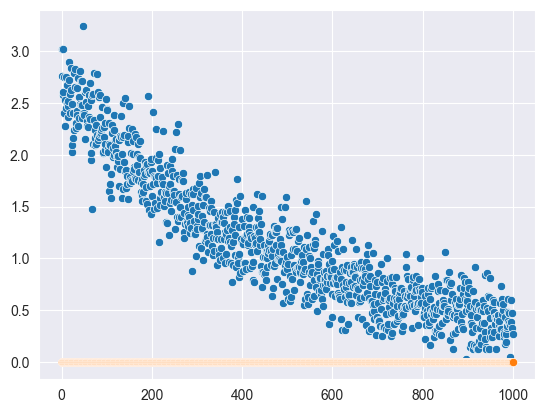

GT theta: [-1.87180218], fitted theta: [-1.66577968]


In [4]:
number_of_edges_metric = NumberOfEdgesDirected() if is_directed else NumberOfEdgesUndirected()
fitted_ergm = ERGM(n, [number_of_edges_metric], is_directed=is_directed, n_networks_for_grad_estimation=100, seed_MCMC_proba=p)

grads, true_grads = fitted_ergm.fit(adj_mat, lr=0.002, opt_steps=1000, sliding_grad_window_k=10, sample_pct_growth=0.05)

grads = [x[0] for x in grads]
true_grads = [x[0] for x in true_grads]
sns.scatterplot(grads)
sns.scatterplot(true_grads)
plt.show()

print(f"GT theta: {ground_truth_theta}, fitted theta: {fitted_ergm._thetas}")

In [5]:
fitted_p = np.e**fitted_ergm._thetas[0] / (1 + np.e**fitted_ergm._thetas[0])
fitted_p

np.float64(0.15898766885960922)